In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [5]:
# Data collection & preprocessing...
housing_Data = pd.read_csv(r"C:\Users\omi84\OneDrive\Desktop\Anveshan\House-Price-Prediction\assets\HousingData.csv")
housing_Data.head(), housing_Data.describe(), housing_Data.shape

(      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO       B  LSTAT  MEDV
 0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3  396.90   4.98  24.0
 1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8  396.90   9.14  21.6
 2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8  392.83   4.03  34.7
 3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7  394.63   2.94  33.4
 4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7  396.90    NaN  36.2,
              CRIM          ZN       INDUS        CHAS         NOX          RM         AGE         DIS         RAD         TAX     PTRATIO           B       LSTAT        MEDV
 count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000  486.000000  506.000000  506.000000  506.000000  506.000000  506.000000  486.000000  506.000000
 mean     3.611874   11.211934   11.083992    0.069959 

In [6]:
housing_Data.isnull().sum() #Counting the null elements in the dataset...

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [7]:
#fixing the null values...
housing_Data = housing_Data.interpolate()

Understanding the correlation between the various columns...

In [8]:
correlation = housing_Data.corr()

<Axes: >

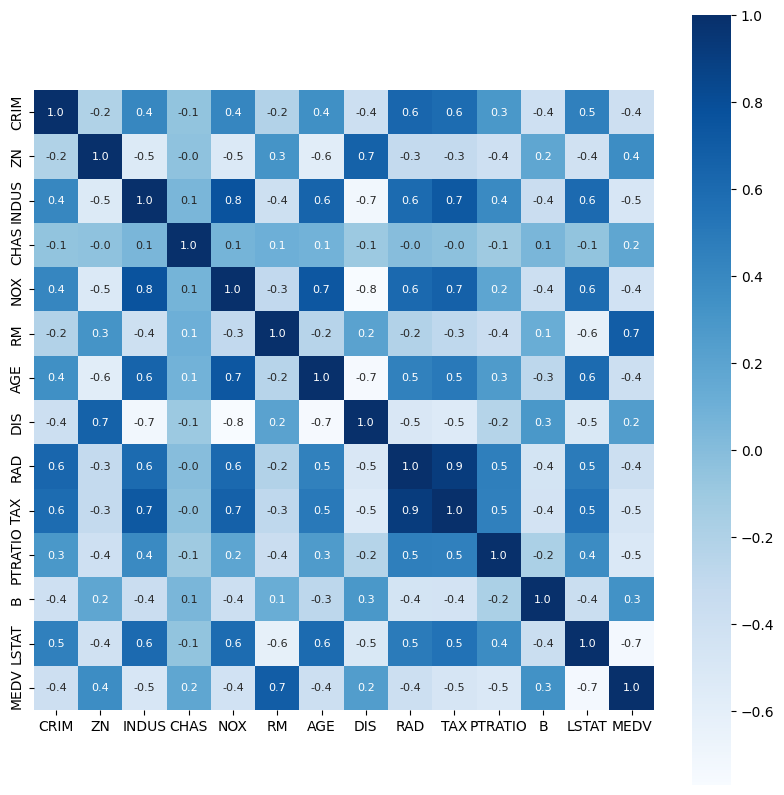

In [9]:
#constructing a heatmap to understand the correlation...
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [10]:
X = housing_Data.drop(['MEDV'], axis=1)
Y = housing_Data['MEDV']
X, Y

(        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO       B   LSTAT
 0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3  396.90   4.980
 1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8  396.90   9.140
 2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8  392.83   4.030
 3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7  394.63   2.940
 4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7  396.90   4.075
 ..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...      ...     ...     ...
 501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273     21.0  391.99  11.705
 502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273     21.0  396.90   9.080
 503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273     21.0  396.90   5.640
 504  0.10959   0.0  11.93   0.0  0.573 

In [11]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [12]:
X.shape, X_Train.shape, X_Test.shape

((506, 13), (404, 13), (102, 13))

In [13]:
#Model Training...
model = XGBRegressor()

In [14]:
#Training the model...
model.fit(X_Train,Y_Train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [15]:
#Prediction on training data...
training_prediction = model.predict(X_Train)
training_prediction

array([23.12741  , 20.99967  , 20.104548 , 34.697304 , 13.905227 ,
       13.49358  , 22.002964 , 15.193056 , 10.903631 , 22.69912  ,
       13.80336  ,  5.598411 , 29.804115 , 49.995243 , 34.89918  ,
       20.605148 , 23.378254 , 19.211464 , 32.70813  , 19.617844 ,
       26.991615 ,  8.402697 , 46.00438  , 21.73115  , 27.07693  ,
       19.37448  , 19.289654 , 24.80046  , 22.60807  , 31.697842 ,
       18.527061 ,  8.704573 , 17.402796 , 23.692617 , 13.298056 ,
       10.495581 , 12.707562 , 25.016329 , 19.682314 , 14.88907  ,
       24.218725 , 24.985615 , 14.907498 , 17.001278 , 15.598303 ,
       12.706678 , 24.506876 , 15.012227 , 49.998726 , 17.540766 ,
       21.195925 , 32.00472  , 15.59149  , 22.895308 , 19.317974 ,
       18.73286  , 23.297768 , 37.204308 , 30.09824  , 33.102432 ,
       20.984814 , 50.00407  , 13.403181 ,  5.001305 , 16.494825 ,
        8.397513 , 28.687069 , 19.5076   , 20.595497 , 45.395954 ,
       39.79782  , 33.402565 , 19.832367 , 33.401398 , 25.2724

There are mainly 2 ways to evaluate the regression model.
1. R2 Error
2. Mean absolute error

In [16]:
#R2 Error...
score1 = r2_score(Y_Train, training_prediction)
print("R Squared error : ", score1)

score2 = mean_absolute_error(Y_Train, training_prediction)
print('mean_absolute_error : ', score2)

R Squared error :  0.9999974689898848
mean_absolute_error :  0.010297510175421718


evaluating for testing data...

In [17]:
#Prediction on testing data...
testing_prediction = model.predict(X_Test)
testing_prediction

array([20.29299  , 21.157701 , 32.765797 , 30.314161 ,  7.9712615,
       14.3031845, 24.275688 , 23.990458 , 24.756582 , 21.778133 ,
       26.270697 , 26.81663  , 20.013536 , 20.440865 , 14.257109 ,
       22.22636  , 19.28636  , 11.632523 ,  8.327819 , 14.340195 ,
       22.559217 , 20.112442 , 34.608017 , 18.800274 , 15.691255 ,
       17.653109 , 45.574688 , 32.609627 , 34.696373 , 18.537771 ,
       16.16312  , 20.053377 , 31.44967  , 24.45732  , 11.718213 ,
       16.947914 , 11.603213 , 21.918049 , 21.645988 , 21.288761 ,
       26.940247 , 13.207544 , 24.443851 ,  7.891706 , 20.183764 ,
       12.437154 , 34.673405 , 15.990962 , 31.052713 , 14.704399 ,
       30.618216 , 26.224497 ,  6.2560787, 34.500347 , 12.274417 ,
       18.550623 , 19.252548 , 19.684504 , 15.554559 , 21.203259 ,
       19.698065 , 20.50454  , 17.896557 , 29.691908 , 35.050537 ,
       24.96585  , 49.90361  , 24.564837 , 11.12624  , 23.460005 ,
       15.01527  ,  7.96672  , 15.31242  , 18.618393 , 26.7540

In [18]:
#R2 Error...
score1 = r2_score(Y_Test, testing_prediction)
print("R Squared error : ", score1)

score2 = mean_absolute_error(Y_Test, testing_prediction)
print('mean_absolute_error : ', score2)

R Squared error :  0.8927734909084691
mean_absolute_error :  2.070530894223381


Visualizing the actual vs the predicted prices...

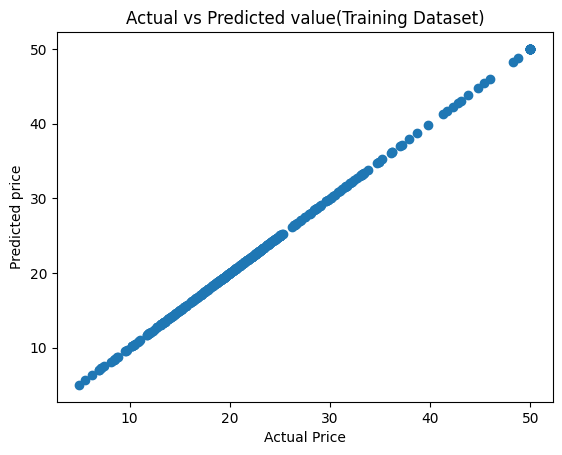

In [19]:
#On training Dataset...
plt.scatter(Y_Train, training_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Actual vs Predicted value(Training Dataset)")
plt.show()

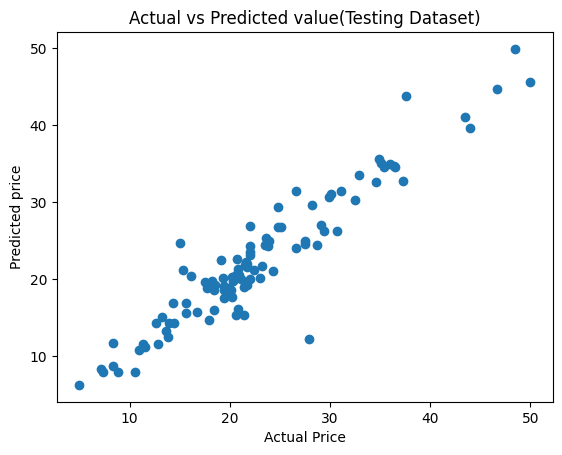

In [20]:
#On testing Dataset...
plt.scatter(Y_Test, testing_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Actual vs Predicted value(Testing Dataset)")
plt.show()

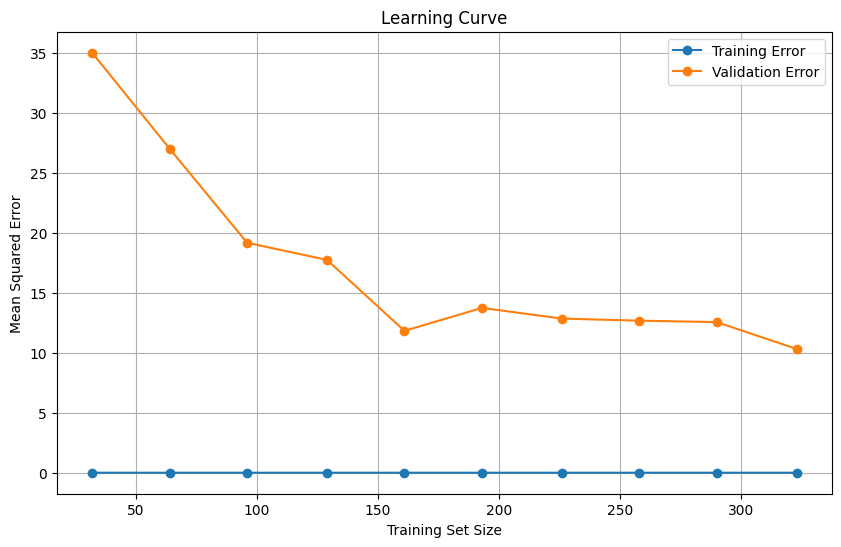

In [21]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Generate learning curves
train_sizes, train_scores, val_scores = learning_curve(
    model, X_Train, Y_Train, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# Convert negative MSE to positive for plotting
train_scores_mean = -train_scores.mean(axis=1)
val_scores_mean = -val_scores.mean(axis=1)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Error', marker='o')
plt.plot(train_sizes, val_scores_mean, label='Validation Error', marker='o')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid()
plt.show()